In [109]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline


In [110]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,9)
matplotlib.rcParams['figure.facecolor'] =  '#00000000'

In [111]:
medical_df = pd.read_csv(r"C:\Users\Codex_Jay\Downloads\insurance.csv")
medical_df 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [112]:
#Obejective is to find a way to estimate the value in the charges column using the values in the other columns
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Statistics for numerical columns

In [113]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [114]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [115]:
fig = px.histogram(
    medical_df,
    x = 'age',
    marginal = 'box',
    nbins = 47,
    title = 'Distribution of Age'
)
fig.update_layout(bargap = 0.1)
fig.show()

## Distribution of Body Mass Index (BMI)

In [116]:
fig = px.histogram(
    medical_df,
    x = 'bmi',
    marginal = 'box',
    color_discrete_sequence = ['red'],
    title = 'Distribution of BMI (Body Mass Index)'
)
fig.update_layout(bargap = 0.1)
fig.show()

* Distribution of the BMI follows a Gaussian distribtion, with most people having their bmi around 25-35, which is likely around the normal weight and overweight slighly

## Distribution of  Medical Insurance Charges

In [117]:
fig = px.histogram(
    medical_df,
    x = 'charges',
    marginal = 'box',
    color = 'smoker',
    color_discrete_sequence = ['green', 'grey'],
    title = 'Annual Medical Charges'
)
fig.update_layout(bargap = 0.2)
fig.show()

* The Medical insurance charges follows the power law, with alot of people clustering around the lower amount range, and then with an exponential decrease.

In [118]:
fig = px.histogram(
    medical_df,
    x = 'charges',
    marginal = 'box',
    color = 'sex',
    color_discrete_sequence = ['green', 'grey'],
    title = 'Annual Medical Charges'
)
fig.update_layout(bargap = 0.2)
fig.show()

In [119]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [120]:
px.histogram(medical_df, x = 'smoker', color = 'sex', title = 'Smoker' )

### Relationship between Age vs Charges

In [121]:
fig = px.scatter(
    medical_df,
    x = 'age',
    y = 'charges',
    color = 'smoker',
    opacity = 0.8,
    hover_data = ['sex'],
    title = 'Age vs Charges'
)
fig.update_traces(marker_size = 5)
fig.show()

* 3 clear clusters which forms a linear trend as increasing with age, but there is a mix of smoker and non-smoker. This tells that among non smokers most people incur a lower annual charges that goes from 0 - 5k at age 18 and goes up to 13k and 15 at age 64.

### BMI AND CHARGES

In [122]:
fig = px.scatter(
    medical_df,
    x = 'bmi',
    y = 'charges',
    color = 'smoker',
    opacity = 0.8,
    hover_data = ['sex'],
    title = 'BMI vs Charges'
)
fig.update_traces(marker_size = 5)
fig.show()

In [123]:
px.violin(medical_df,
x = 'children', 
y = 'charges',
title = 'Children vs Charges')

### Computing Correlation Coefficients

In [124]:
print(f'Correlation between charges and age: {medical_df.charges.corr(medical_df.age)}')
print(f'Correlation between charges and bmi: {medical_df.charges.corr(medical_df.bmi)}')
print(f'Correlation between charges and children: {medical_df.charges.corr(medical_df.children)}')

Correlation between charges and age: 0.2990081933306478
Correlation between charges and bmi: 0.19834096883362887
Correlation between charges and children: 0.06799822684790487


In [125]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
smoker_numeric
print(f'Correlation between charges and children: {medical_df.charges.corr(smoker_numeric)}')

Correlation between charges and children: 0.7872514304984778


In [126]:
medical_df.select_dtypes('number').corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


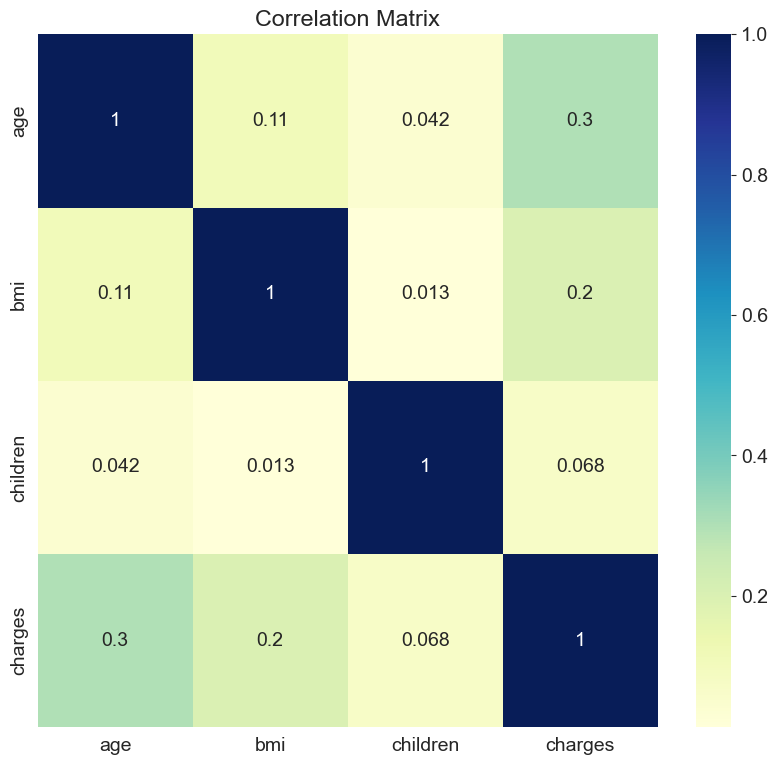

In [127]:
sns.heatmap(medical_df.select_dtypes('number').corr(), cmap = 'YlGnBu', annot = True)
plt.title('Correlation Matrix');

### Linear Regression using a Single Feature

In [128]:
non_smoker_df = medical_df[medical_df.smoker == 'no']
non_smoker_df.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


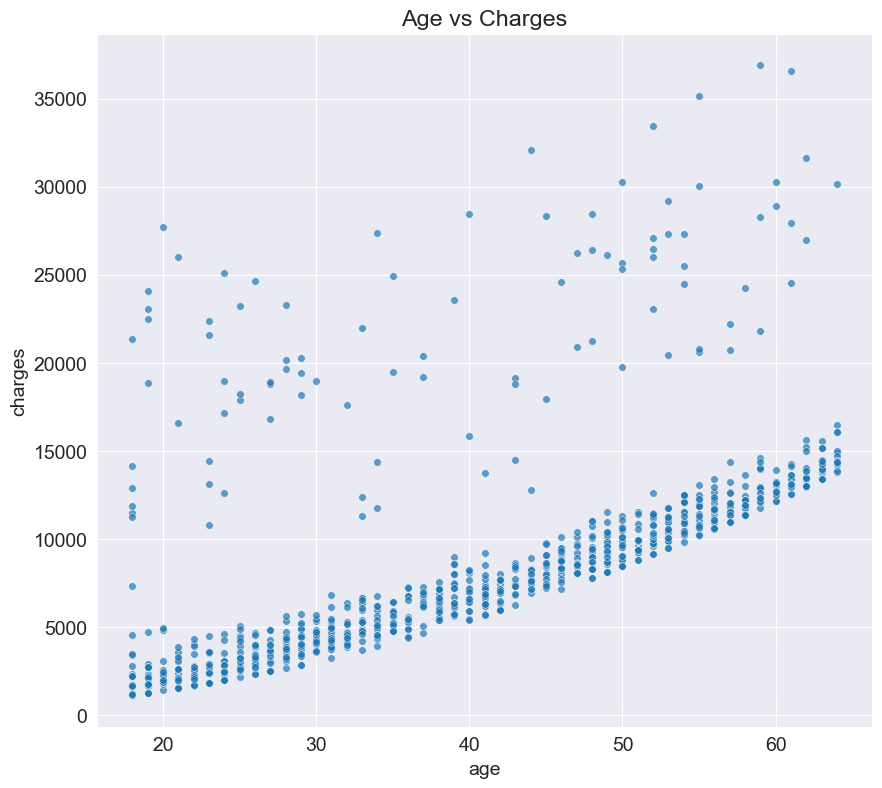

In [129]:
plt.title('Age vs Charges') 
sns.scatterplot(data = non_smoker_df, x = 'age', y = 'charges', alpha = 0.7, s = 30);

* charges = w x age + b
* we'll try to determine w and b for the line that best fits the data

In [130]:
def estimate_charges(age, w, b):
    return w * age + b

In [131]:
w = 50
b = 100

estimate_charges(40, w, b)

2100

In [132]:
ages = non_smoker_df.age
ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [133]:
estimated_charges = estimate_charges(ages, w, b)

In [134]:
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

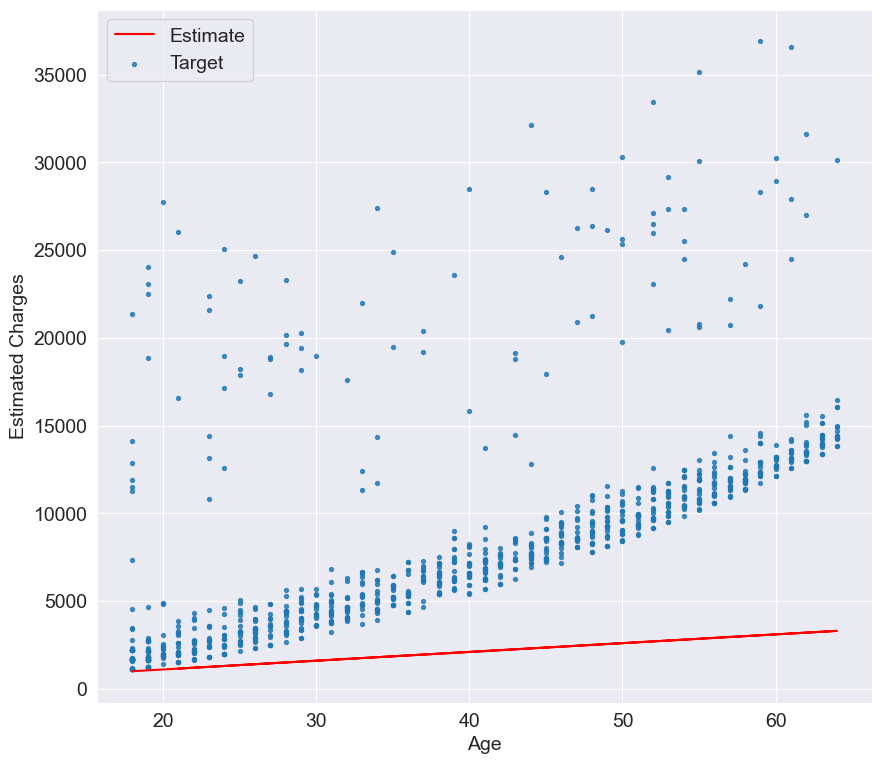

In [135]:
target = non_smoker_df.charges
plt.plot(ages, estimated_charges, 'r')
plt.scatter(ages, target, s= 8, alpha = 0.8)
plt.xlabel('Age')
plt.ylabel('Estimated Charges')
plt.legend(['Estimate', 'Target'])

### Loss/Cost Function

In [136]:
target = non_smoker_df.charges
prediction = estimate_charges

In [137]:
from sklearn.linear_model import LinearRegression

In [138]:
model = LinearRegression()

In [139]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [140]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df['charges']


In [141]:
model.fit(inputs, targets)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [142]:
model.predict(np.array([[23], [37], [61]]))

c:\Users\Codex_Jay\Desktop\Python\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [143]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289], shape=(1064,))

In [144]:

targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [145]:
model.coef_

array([267.24891283])

In [146]:
model.intercept_

np.float64(-2091.4205565650864)